<a href="https://colab.research.google.com/github/thoreau024/DATA-612-HW-Spencer-Flynn/blob/main/DATA_612_Final_Project_Titanic_Shipwreck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import random as rnd
import os
import re
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (8, 6)


# Supervised Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn import feature_selection
from sklearn.ensemble import VotingClassifier
import statsmodels.api as sm # Logistic Regression with StatModels
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap
!pip install scikit-plot
import scikitplot as skplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Warnings
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [155]:
# Parameters:
n_splits = 2 # Cross Validation Splits
n_iter = 70 # Randomized Search Iterations
scoring = 'accuracy' # Model Selection during Cross-Validation
rstate = 27 # Random State used 
testset_size = 0.4

In [3]:
#Importing downloaded CSV files
from google.colab import files
import io

In [4]:
uploaded = files.upload()

Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [156]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
valid = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [157]:
print('Train Set Variables: ', train.columns)
print('Test Set Variables: ' ,valid.columns)
Survived = train['Survived']

Train Set Variables:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test Set Variables:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [158]:
print('Missing Values in Train Data: ')
display(train.isnull().sum())

Missing Values in Train Data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
print('Missing Values in Test Data: ')
display(valid.isnull().sum())

Missing Values in Test Data: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the training data there are missing values in the age, cabin and embarked columns. In the validation data set there are missing values in the age, fare and cabin columns.

In [160]:
train.set_index('PassengerId', inplace = True)
PassengerID = valid['PassengerId']
valid.set_index('PassengerId', inplace = True)

In [161]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [162]:
traindex = train.index
validdex = valid.index
Survived_train = train['Survived'].copy()
df = pd.concat([valid, train])


In [163]:
display(df.isnull().sum())

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Survived     418
dtype: int64

##Family Name

In [164]:
import string
def get_lastname(data):
  families = []
  for i in range(len(data)):
    name = data.iloc[i]
    if '(' in name:
      name_bracket_removed = name.split('(')[0]
    else: 
      name_bracket_removed = name
    family = name_bracket_removed.split(',')[0]
    title = name_bracket_removed.split(',')[1].strip().split(' ')[0]
    for c in string.punctuation:
      family = family.replace(c, '').strip()
    families.append(family)
  return families
df['Family'] = get_lastname(df['Name'])

#Title
Created new feature 'Title' by splitting name feature. After splitting titles we're grouped into similar groups and changed into dummy variables.

In [165]:
df['Title'] = df['Name'].str.split(', ', expand = True)[1].str.split('. ', expand=True)[0]

In [166]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona',
       'Don', 'Mme', 'Major', 'Lady', 'Sir', 'Mlle', 'Capt', 'th',
       'Jonkheer'], dtype=object)

In [167]:
df.loc[df['Title'] == 'th']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Title
PassengerId,,,,,,,,,,,,,
760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,1.0,Rothes,th


'th' represents the Countess which is Royaly

In [168]:
df.loc[df['Title'] == 'Dona']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Title
PassengerId,,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN,Oliva y Ocana,Dona


In [169]:
df.loc[df['Title'] == 'Don']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Title
PassengerId,,,,,,,,,,,,,
31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0.0,Uruchurtu,Don


Kaggle allows and encourages doing research as a part of completeing the competition. The following links were used to categorize the above titles. 

Don - falls into class Mr
https://en.wikipedia.org/wiki/Manuel_Uruchurtu_Ram%C3%ADrez

Dona - falls into Miss
https://www.encyclopedia-titanica.org/titanic-survivor/fermina-oliva-y-ocana.html

In [170]:
# { "Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Office" : 4, "Royalty" : 5}
df['Title'].replace({
    "Mr" :        0,
    "Don" :       0,
    "Mme":        1,
    "Ms":         1,
    "Mrs" :       1,
    "Miss" :      2,
    "Mlle":       2,
    "Dona":        2,
    "Master" :    3,
    "Dr" :         4,
    "Rev":        4,
    "Capt":       4,
    "Col":        4,
    "Major":      4,
    "Jonkheer":   5,
    "Sir" :       5,
    "Lady" :      5,
    "th" :        5
}, inplace=True)

In [171]:
df['Title'].unique()

array([0, 1, 2, 3, 4, 5])

In [172]:
df['Title'].value_counts()

0    758
2    263
1    200
3     61
4     23
5      4
Name: Title, dtype: int64

#Fare
Replaced missing Fare value with median values for similar passengers.
Binned Fare into 5 groups

In [173]:
df.loc[df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Title
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,Storey,0


In [174]:
nullfare_1044 = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S') & (df['Title'] == 0) & (df['Age'] >= 50) & (df['Age'] < 63)]['Fare'].median()
print(nullfare_1044)


7.9


In [175]:
df.loc[df['Fare'].isnull(), 'Fare'] = nullfare_1044

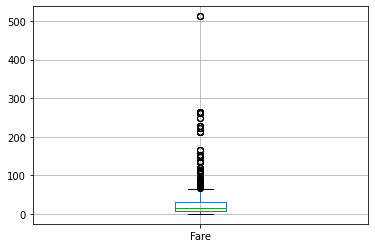

In [176]:
df.boxplot(column=['Fare'])

In [177]:
fare = pd.qcut(df['Fare'], 5)

In [178]:
fare = pd.Categorical(fare)
df['Fare'] = fare.codes

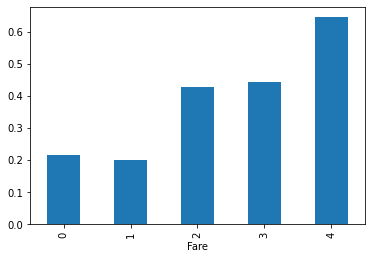

In [179]:
df[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot.bar()


#Age
Replaced missing ages with median values for similar groups. Then I binned the ages into 5 groups.

In [180]:
df['Age'] = df.groupby(['Sex','Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [181]:
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
Survived     418
Family         0
Title          0
dtype: int64

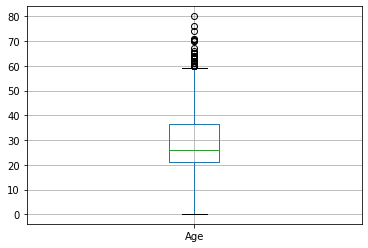

In [182]:
df.boxplot(column=['Age'])

In [183]:
age = pd.qcut(df['Age'].astype(int), 5)
age = pd.Categorical(age)

In [184]:
df['Age'] = age.codes

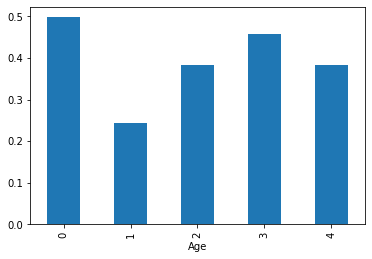

In [185]:
df[['Age','Survived']].groupby('Age')['Survived'].mean().plot.bar()


#Cabin
Removing number from Cabin. Resulting in a feature representing the deck the passenger was on.

In [186]:
df['Cabin'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [187]:
df['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G', 'T'], dtype=object)

In [188]:
df['Cabin'].replace({
    "M" :        0,
    "B" :        1,
    "E":         2,
    "A":         3,
    "C" :        4,
    "D" :        5,
    "F":         6,
    "G":         7,
    "T" :        8
}, inplace=True)

#Embarked

In [189]:
df.loc[df['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family,Title
PassengerId,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,3,0,0,113572,4,1,NaN,1.0,Icard,2
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,4,0,0,113572,4,1,NaN,1.0,Stone,1


Seeing that we only have two NA values for Embarked I found the missing information at the following links.

Miss Amelie: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

Mrs. George Nelson: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [190]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

In [191]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [192]:
df['Embarked'].replace({
    "Q" :        0,
    "S" :        1,
    "C":         2
}, inplace=True)

In [193]:
display(df.isnull().sum())

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
Survived    418
Family        0
Title         0
dtype: int64

#New Features out of Existing Variables

## Family Size

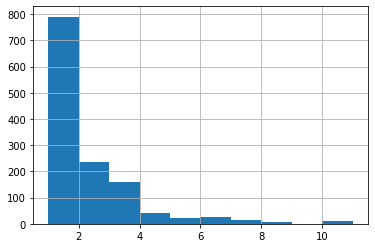

In [194]:
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df['Family Size'].hist()

In [195]:
df['Family Size'] = df['Family Size'].map(lambda s: 1 if s == 1 else (2 if s ==2 else( 3 if 3 <= s <= 4 else(4 if s >= 5 else 0))))

In [196]:
df['Family Size'].value_counts()

1    790
2    235
3    202
4     82
Name: Family Size, dtype: int64

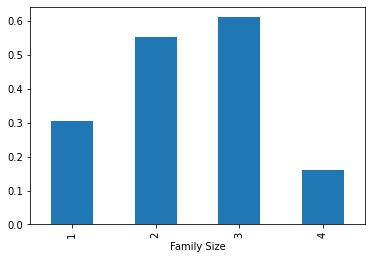

In [197]:
df[['Family Size','Survived']].groupby('Family Size')['Survived'].mean().plot.bar()


## Passenger is Alone

In [198]:
df['IsAlone'] = 0
df.loc[df['Family Size'] == 1, 'IsAlone'] = 1

##Sex

In [199]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

In [200]:
df = df.drop(['Name', 'Ticket', 'Survived', 'Family'], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pclass       1309 non-null   int64
 1   Sex          1309 non-null   int64
 2   Age          1309 non-null   int8 
 3   SibSp        1309 non-null   int64
 4   Parch        1309 non-null   int64
 5   Fare         1309 non-null   int8 
 6   Cabin        1309 non-null   int64
 7   Embarked     1309 non-null   int64
 8   Title        1309 non-null   int64
 9   Family Size  1309 non-null   int64
 10  IsAlone      1309 non-null   int64
dtypes: int64(9), int8(2)
memory usage: 144.8 KB


### Last Look at Data

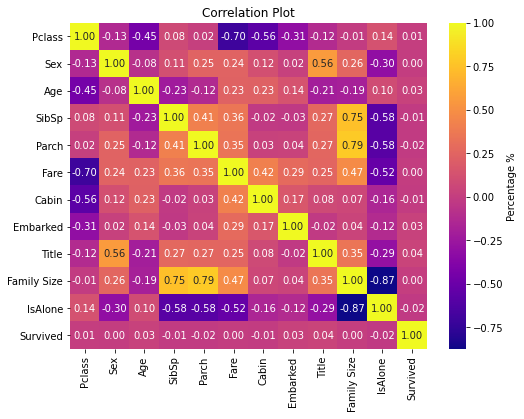

In [201]:
f, ax = plt.subplots(figsize=[8,6])
sns.heatmap(pd.concat([df.loc[traindex, :], Survived], axis=1).corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap="plasma",ax=ax)
ax.set_title("Correlation Plot")
plt.show()

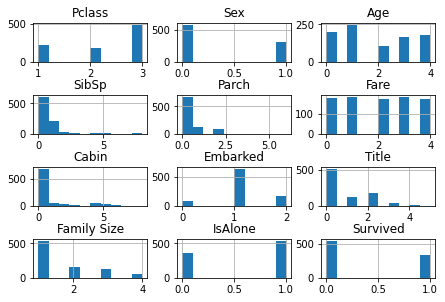

In [202]:
pd.concat([df.loc[traindex, :], Survived], axis=1).hist()
plt.tight_layout(pad=0)
plt.show()

### Splitting Data back into Original Train/Test Sets.

In [203]:
df.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Family Size    0
IsAlone        0
dtype: int64

In [204]:
train_df = df.loc[traindex, :]
train_df['Survived'] = Survived
test_df = df.loc[validdex, :]

In [207]:
X = train_df.drop(["Survived"] , axis=1)
y = Survived
X_test_final = test_df

print("X, Y, Test Shape:",X.shape, y.shape, test_df.shape) # Data Dimensions

X, Y, Test Shape: (891, 11) (891,) (418, 11)


### Splitting Train Data into Train/Test

In [208]:
# Stratified Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testset_size, stratify=y,random_state=rstate)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Stratified Cross-Validation
cv = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.4, random_state=rstate)

## Function for storing Model Results

In [209]:

results = pd.DataFrame(columns=['Model','Para','Test_Score','CV Mean','CV STDEV'])
ensemble_models= {}

def save(model, modelname):

    global results
   
    model.best_estimator_.fit(X_train, y_train)
    scores = cross_val_score(model.best_estimator_, X_train, y_train, cv=5,
                             scoring=scoring, verbose =0)
    CV_scores = scores.mean()
    STDev = scores.std()
    Test_scores = model.score(X_test, y_test)

 
    results = results.append({'Model': modelname,'Para': model.best_params_,'Test_Score': Test_scores,
                             'CV Mean':CV_scores, 'CV STDEV': STDev}, ignore_index=True)
    ensemble_models[modelname] = model.best_estimator_
    
   
    print("\nEvaluation Method: {}".format(scoring))
    print("Optimal Model Parameters: {}".format(grid.best_params_))
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (CV_scores, STDev, modelname))
    print('Test_Score:', Test_scores)
        
   
    model.best_estimator_.fit(X_train, y_train)
    pred = model.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, pred, title="{} Confusion Matrix".format(modelname),
                normalize=True,figsize=(6,6),text_fontsize='large')
    plt.show()


### Pipelines for Selected Models and Ensemble Voting 

In [210]:
pipeline_lr = make_pipeline(StandardScaler(),PCA(n_components=8),
                            LogisticRegression()
                            )

pipeline_svc = make_pipeline(StandardScaler(),
                             PCA(),
                             SVC(probability=True),
                             )

pipe_knn = make_pipeline(StandardScaler(),
                        PCA(),
                        KNeighborsClassifier())

pipeline_dtc = make_pipeline(StandardScaler(),
                             PCA(),
                             DecisionTreeClassifier())

pipeline_rfc = make_pipeline(StandardScaler(),
                             PCA(),
                             RandomForestClassifier())
eclf_hard = EnsembleVoteClassifier(clfs=[pipeline_lr, pipeline_svc, pipe_knn, pipeline_dtc, pipeline_rfc], weights=[1,1,1,1,1], voting = 'hard')
eclf_soft = EnsembleVoteClassifier(clfs=[pipeline_lr, pipeline_svc, pipe_knn, pipeline_dtc, pipeline_rfc], weights=[1,1,1,1,1], voting = 'soft')


In [211]:
clfs = {
'LogisticRegression Pipeline' : pipeline_lr,
'SVC Pipeline': pipeline_svc,
'KNeighborsClassifier Pipeline': pipe_knn,
'DecisionTreeClassifier Pipeline': pipeline_dtc,
'RandomForest Pipeline': pipeline_rfc,
'Ensemble Hard': eclf_hard,
'Ensemble Soft': eclf_soft
}

In [214]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])


for clf, clf_name in zip(clfs.values(), clfs.keys()):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression Pipeline,0.786325,0.671533,0.724409,0.803922
1,SVC Pipeline,0.823009,0.678832,0.744000,0.820728
2,KNeighborsClassifier Pipeline,0.795082,0.708029,0.749035,0.817927
3,DecisionTreeClassifier Pipeline,0.724409,0.671533,0.696970,0.775910
4,RandomForest Pipeline,0.791667,0.693431,0.739300,0.812325
5,Ensemble Hard,0.826087,0.693431,0.753968,0.826331
6,Ensemble Soft,0.770492,0.686131,0.725869,0.801120


#Logistic Regression

In [215]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


Evaluation Method: accuracy
Optimal Model Parameters: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear', 'pca__n_components': 5}
Train CV Accuracy: 0.80 (+/- 0.05) [Logistic Regression]
Test_Score: 0.7983193277310925


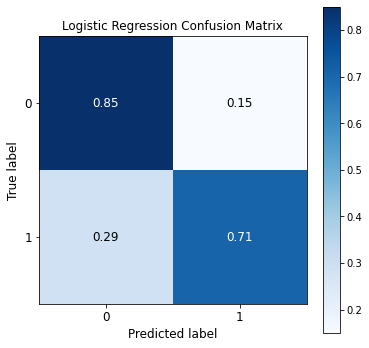

In [216]:

grid_params_lr = { 'pca__n_components': range(0,40),
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 1.5, 2, 10],
    'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(estimator = pipeline_lr, 
                  param_grid = grid_params_lr, 
                  scoring = scoring, 
                  cv = cv,)


grid.fit(X_train, y_train) 
save(grid, "Logistic Regression")

#SVC Model

In [217]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


Evaluation Method: accuracy
Optimal Model Parameters: {'pca__n_components': 10, 'svc__C': 1}
Train CV Accuracy: 0.82 (+/- 0.04) [SVC]
Test_Score: 0.8207282913165266


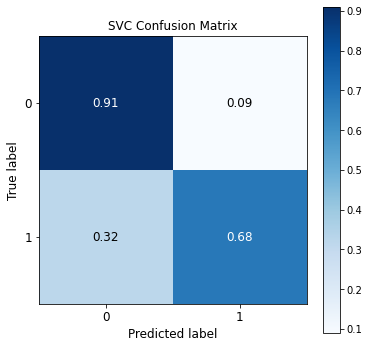

In [218]:
param_grid = {'pca__n_components': range(0,40), 'svc__C':[0.001,0.1,1]}


grid = GridSearchCV(estimator = pipeline_svc, 
                  param_grid = param_grid, 
                  scoring = scoring, 
                  cv = cv,)
grid.fit(X_train,y_train)
save(grid, "SVC")

#KNN Model

Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished



Evaluation Method: accuracy
Optimal Model Parameters: {'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__weights': 'distance', 'pca__n_components': 8}
Train CV Accuracy: 0.78 (+/- 0.02) [KNN]
Test_Score: 0.8095238095238095


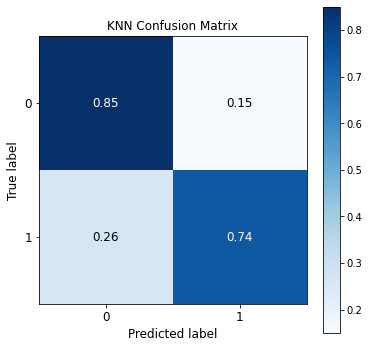

In [219]:
# Hyper parameters. Since RandomizedSearchCV is used, I use an uniform random interger range for the function to choose from.
param_grid ={'pca__n_components': range(0,40),'kneighborsclassifier__n_neighbors': st.randint(1,40),
             # Increasing this value reduces bias, and increases variance. Don't Overfit!
            'kneighborsclassifier__weights':['uniform','distance']
            }
# Hyper-Parameter Tuning with Cross-Validation
grid = RandomizedSearchCV(pipe_knn,
                    param_grid, # Hyper Parameters
                    cv=cv, # Cross-Validation splits. Stratified.
                    scoring=scoring, # Best-Validation selection metric.
                    verbose=1, # Quality of Life. Frequency of model updates
                    n_iter=n_iter, # Number of hyperparameter combinations tried.
                    random_state=rstate) # Reproducibility 

# Execute Tuning on entire dataset
grid.fit(X_train, y_train)
save(grid, 'KNN')

#Decision Tree

In [220]:
pipeline_dtc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'decisiontreeclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished



Evaluation Method: accuracy
Optimal Model Parameters: {'pca__n_components': 8, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__max_depth': 500, 'decisiontreeclassifier__criterion': 'entropy'}
Train CV Accuracy: 0.77 (+/- 0.01) [Decision Tree]
Test_Score: 0.8123249299719888


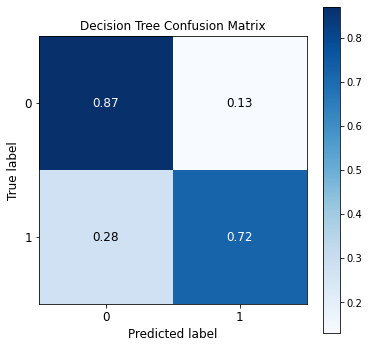

In [221]:
# Parameter Tuning
param_grid ={'pca__n_components': range(0,40),"decisiontreeclassifier__criterion": ['gini', 'entropy'],
    "decisiontreeclassifier__splitter": ['best','randon'],
    "decisiontreeclassifier__max_depth": [10,100,500,1000]}

model = pipeline_dtc
grid = RandomizedSearchCV(model,
                    param_grid, cv=cv, scoring=scoring,
                    verbose=1,n_iter=n_iter, random_state=rstate)

grid.fit(X_train, y_train)
save(grid, 'Decision Tree')

#Random Forest

In [222]:
pipeline_rfc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'random

Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.4s finished



Evaluation Method: accuracy
Optimal Model Parameters: {'pca__n_components': 7, 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_leaf_nodes': 9}
Train CV Accuracy: 0.81 (+/- 0.05) [RFC]
Test_Score: 0.8235294117647058


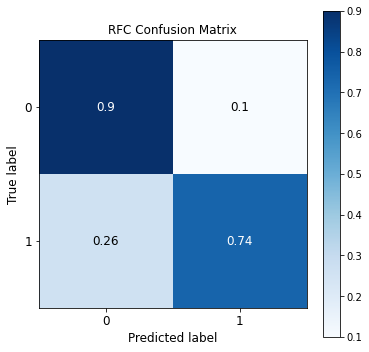

In [223]:
param_grid ={'pca__n_components': range(0,40), 'randomforestclassifier__max_depth': st.randint(3, 11), 'randomforestclassifier__max_features':["sqrt", "log2"],'randomforestclassifier__max_leaf_nodes':st.randint(6, 10)
            }

model= pipeline_rfc

grid = RandomizedSearchCV(model,
                    param_grid, cv=cv,
                    scoring=scoring,
                    verbose=1,n_iter=n_iter, random_state=rstate)

grid.fit(X_train, y_train)
save(grid, 'RFC')

In [224]:
pipeline_lr = make_pipeline(StandardScaler(),PCA(n_components=7),
                            LogisticRegression(C=1.5, solver = 'liblinear')
                            )

pipeline_svc = make_pipeline(StandardScaler(),
                             PCA(n_components = 9),
                             SVC(probability=True, C=1),
                             )

pipe_knn = make_pipeline(StandardScaler(),
                        PCA(n_components = 7),
                        KNeighborsClassifier(n_neighbors = 17, weights = 'uniform'))

pipeline_dtc = make_pipeline(StandardScaler(),
                             PCA(n_components = 6),
                             DecisionTreeClassifier(splitter = 'best', max_depth = 10, criterion = 'entropy'))

pipeline_rfc = make_pipeline(StandardScaler(),
                             PCA(n_components = 8),
                             RandomForestClassifier(max_depth = 7, max_features = 'log2', max_leaf_nodes = 7))
eclf_hard = EnsembleVoteClassifier(clfs=[pipeline_lr, pipeline_svc, pipe_knn, pipeline_dtc, pipeline_rfc], weights=[1,1,1,1,1], voting = 'hard')
eclf_soft = EnsembleVoteClassifier(clfs=[pipeline_lr, pipeline_svc, pipe_knn, pipeline_dtc, pipeline_rfc], weights=[1,1,1,1,1], voting = 'soft')


In [225]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])
sc = StandardScaler()

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.fit_transform(X_test)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression Pipeline,0.786325,0.671533,0.724409,0.803922
1,SVC Pipeline,0.823009,0.678832,0.744000,0.820728
2,KNeighborsClassifier Pipeline,0.795082,0.708029,0.749035,0.817927
3,DecisionTreeClassifier Pipeline,0.722222,0.664234,0.692015,0.773109
4,RandomForest Pipeline,0.766917,0.744526,0.755556,0.815126
5,Ensemble Hard,0.829060,0.708029,0.763780,0.831933
6,Ensemble Soft,0.776860,0.686131,0.728682,0.803922


#Final Prediction

In [226]:
eclf_soft.fit(X,y)
predictions = eclf_soft.predict(X_test_final)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [227]:
final_prediction = {'PassengerId': PassengerID,
                    'Survived': predictions,
                    }

final_prediction = pd.DataFrame(final_prediction, index=None)
final_prediction = final_prediction[['PassengerId','Survived']]
final_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [229]:
#Code for downloading csv file that must be submitted for the Kaggle Competition
final_prediction.to_csv('Titanic Survived Predictions - Spencer Flynn.csv',index=None)
from google.colab import files
files.download('Titanic Survived Predictions - Spencer Flynn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>